In [1]:
%reload_ext autoreload
%autoreload 2

from fastai.vision import *

# Dogs and cats

## Resnet 34

In [2]:
path = untar_data(URLs.DOGS)
path

PosixPath('/home/adgb/.fastai/data/dogscats')

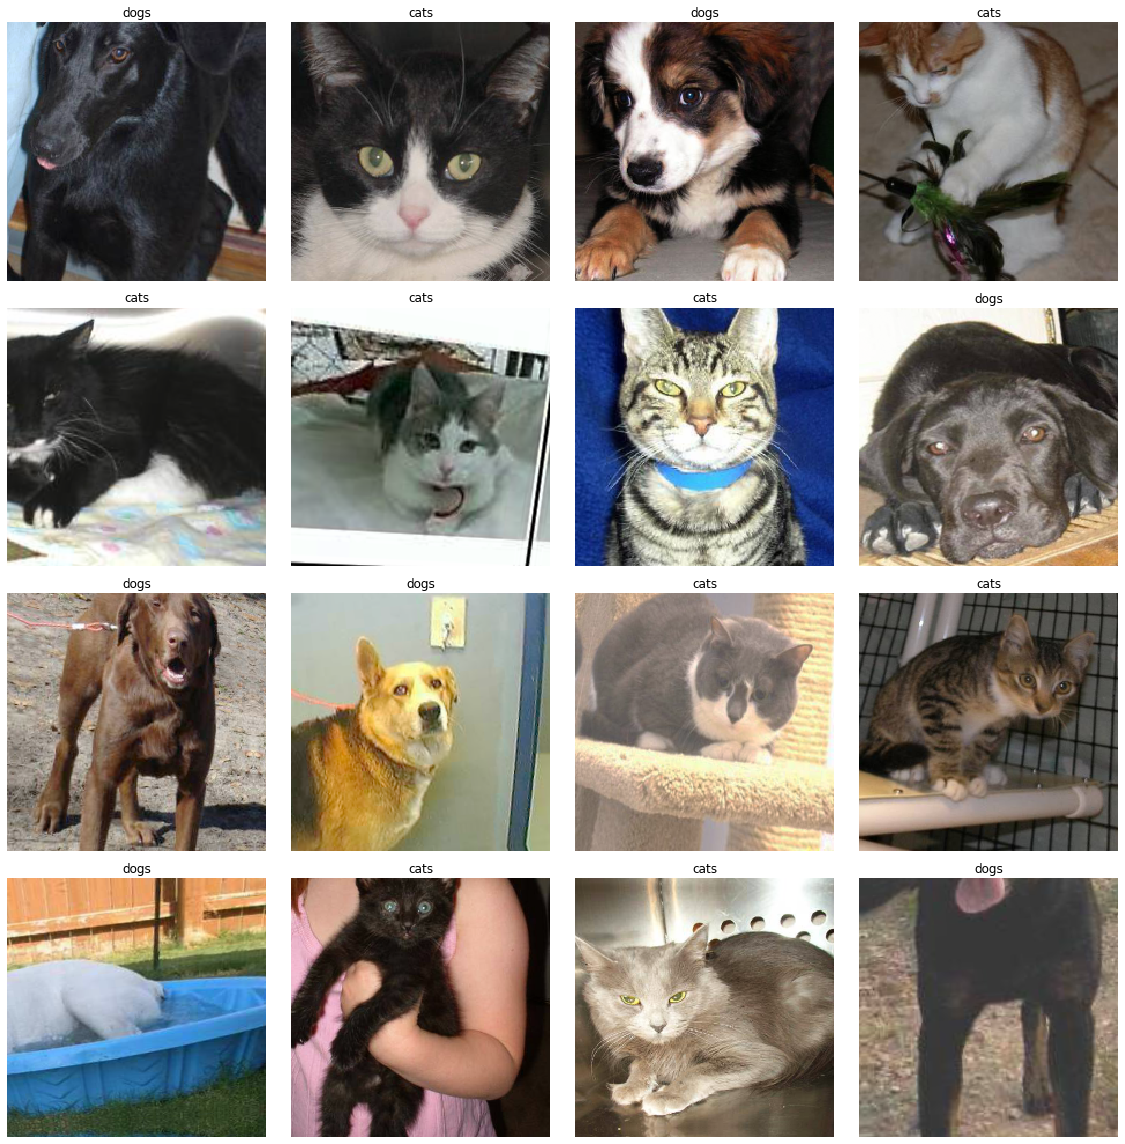

In [3]:
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), size=224).normalize(imagenet_stats)
data.show_batch(rows=4)

In [4]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)
learn.fit_one_cycle(1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /home/adgb/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [5]:
learn.unfreeze()
learn.fit_one_cycle(6, slice(1e-5,3e-4), pct_start=0.05)

In [6]:
accuracy(*learn.TTA())

tensor(0.9960)

## rn50

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)
learn.fit_one_cycle(1)

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(6, slice(1e-5,3e-4), pct_start=0.05)

In [ ]:
accuracy(*learn.TTA())

tensor(0.9940)